# Education Nationale

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import fiona
import folium
import numpy as np

%matplotlib inline

## Imports des datasets

In [2]:
fiona.listlayers("data/ADE_4-0_GPKG_LAMB93_FXX-ED2026-02-16.gpkg")

['canton',
 'arrondissement',
 'arrondissement_municipal',
 'chef_lieu_d_arrondissement',
 'chef_lieu_d_arrondissement_municipal',
 'chef_lieu_de_canton',
 'chef_lieu_de_collectivite_territoriale',
 'chef_lieu_de_commune',
 'chef_lieu_de_commune_associee_ou_deleguee',
 'chef_lieu_de_departement',
 'chef_lieu_d_epci',
 'chef_lieu_de_region',
 'collectivite_territoriale',
 'commune',
 'commune_associee_ou_deleguee',
 'departement',
 'epci',
 'region',
 'info_metadonnees',
 'layer_styles']

In [3]:
geo_communes = gpd.read_file("data/ADE_4-0_GPKG_WGS84G_FRA-ED2026-02-16.gpkg", layer="commune")
geo_communes.head()

,cleabs,nom_officiel,nom_officiel_en_majuscules,statut,code_insee,population,date_du_recensement,organisme_recenseur,code_insee_du_canton,code_insee_de_l_arrondissement,code_insee_du_departement,code_insee_de_la_region,codes_siren_des_epci,code_siren,code_postal,superficie_cadastrale,geometry
0,COMMUNE_0000000000001001,L'Abergement-Clémenciat,L'ABERGEMENT-CLEMENCIAT,Commune simple,01001,860,2023-01-01,INSEE,0108,012,01,84,200069193,210100012,01400,1590,"MULTIPOLYGON (((4.95841 46.15327, 4.95812 46.1..."
1,COMMUNE_0000000000001002,L'Abergement-de-Varey,L'ABERGEMENT-DE-VAREY,Commune simple,01002,270,2023-01-01,INSEE,0101,011,01,84,240100883,210100020,01640,920,"MULTIPOLYGON (((5.4302 45.98277, 5.43012 45.98..."
2,COMMUNE_0000000000001004,Ambérieu-en-Bugey,AMBERIEU-EN-BUGEY,Commune simple,01004,15934,2023-01-01,INSEE,0101,011,01,84,240100883,210100046,01500,2460,"MULTIPOLYGON (((5.40882 45.94206, 5.4085 45.94..."
3,COMMUNE_0000000000001005,Ambérieux-en-Dombes,AMBERIEUX-EN-DOMBES,Commune simple,01005,1906,2023-01-01,INSEE,0122,012,01,84,200042497,210100053,01330,1590,"MULTIPOLYGON (((4.94298 45.97962, 4.94257 45.9..."
4,COMMUNE_0000000000001006,Ambléon,AMBLEON,Commune simple,01006,115,2023-01-01,INSEE,0104,011,01,84,200040350,210100061,01300,590,"MULTIPOLYGON (((5.57083 45.75338, 5.57219 45.7..."


In [4]:
data_ips_ecoles = pd.read_csv("data/donnees-ips-ecoles.csv", delimiter=";")
data_ips_ecoles.head()

,rentree_scolaire,code_region,region,code_de_l_academie,academie,code_du_departement,departement,code_insee_de_la_commune,nom_de_la_commune,uai,...,ips_departemental_public,ips_departemental,num_ligne,appellation_officielle,libelle_commune,code_departement,code_commune,libelle_departement,libelle_academie,position
0,2023-2024,3,BRETAGNE,14,RENNES,29.0,FINISTERE,29190,PLOUGONVELIN,0290852U,...,106.5,109.2,39176.0,Ecole élémentaire publique Roz Avel,Plougonvelin,029,29190,Finistère,Rennes,"48.34187237589531,-4.719900198455342"
1,2023-2024,1,AUVERGNE-RHONE-ALPES,8,GRENOBLE,73.0,SAVOIE,73137,JACOB BELLECOMBETTE,0730270X,...,109.4,110.3,55360.0,Ecole primaire du Grand pré,Jacob-Bellecombette,073,73137,Savoie,Grenoble,"45.556540100216054,5.908140414348022"
2,2023-2024,16,OCCITANIE,11,MONTPELLIER,48.0,LOZERE,48067,GABRIAC,0480343M,...,107.3,108.3,45819.0,école primaire,Gabriac,048,48067,Lozère,Montpellier,"44.17819782843561,3.7193504966444375"
3,2023-2024,18,PROVENCE-ALPES-COTE D'AZUR,23,NICE,83.0,VAR,83137,TOULON,0831464R,...,102.4,104.2,59656.0,Ecole primaire Le Mourillon,Toulon,083,83137,Var,Nice,"43.11042198884897,5.936087726113666"
4,2023-2024,3,BRETAGNE,14,RENNES,29.0,FINISTERE,29232,QUIMPER,0290412R,...,106.5,109.2,39073.0,Ecole élémentaire publique Kervilien,Quimper,029,29232,Finistère,Rennes,"47.975981726506035,-4.125720138185192"


In [5]:
data_ips_ecoles_annees = data_ips_ecoles.groupby("rentree_scolaire")
data_ips_ecoles = data_ips_ecoles_annees.get_group("2023-2024")
data_ips_ecoles.head()

,rentree_scolaire,code_region,region,code_de_l_academie,academie,code_du_departement,departement,code_insee_de_la_commune,nom_de_la_commune,uai,...,ips_departemental_public,ips_departemental,num_ligne,appellation_officielle,libelle_commune,code_departement,code_commune,libelle_departement,libelle_academie,position
0,2023-2024,3,BRETAGNE,14,RENNES,29.0,FINISTERE,29190,PLOUGONVELIN,0290852U,...,106.5,109.2,39176.0,Ecole élémentaire publique Roz Avel,Plougonvelin,029,29190,Finistère,Rennes,"48.34187237589531,-4.719900198455342"
1,2023-2024,1,AUVERGNE-RHONE-ALPES,8,GRENOBLE,73.0,SAVOIE,73137,JACOB BELLECOMBETTE,0730270X,...,109.4,110.3,55360.0,Ecole primaire du Grand pré,Jacob-Bellecombette,073,73137,Savoie,Grenoble,"45.556540100216054,5.908140414348022"
2,2023-2024,16,OCCITANIE,11,MONTPELLIER,48.0,LOZERE,48067,GABRIAC,0480343M,...,107.3,108.3,45819.0,école primaire,Gabriac,048,48067,Lozère,Montpellier,"44.17819782843561,3.7193504966444375"
3,2023-2024,18,PROVENCE-ALPES-COTE D'AZUR,23,NICE,83.0,VAR,83137,TOULON,0831464R,...,102.4,104.2,59656.0,Ecole primaire Le Mourillon,Toulon,083,83137,Var,Nice,"43.11042198884897,5.936087726113666"
4,2023-2024,3,BRETAGNE,14,RENNES,29.0,FINISTERE,29232,QUIMPER,0290412R,...,106.5,109.2,39073.0,Ecole élémentaire publique Kervilien,Quimper,029,29232,Finistère,Rennes,"47.975981726506035,-4.125720138185192"


<Axes: >

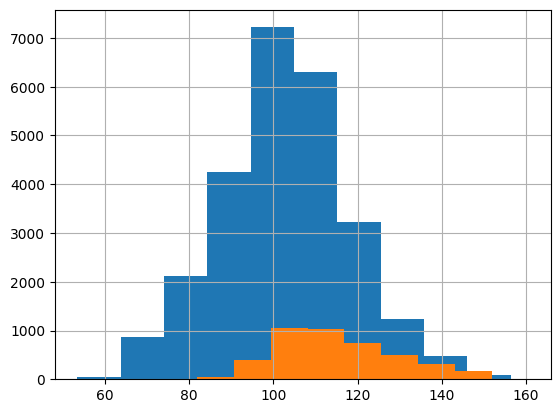

In [6]:
secteurs = data_ips_ecoles.groupby("secteur")
secteurs.get_group("public")["ips"].hist()
secteurs.get_group("privé sous contrat")["ips"].hist()

In [7]:
academies = data_ips_ecoles.groupby("academie")
academies["ips"].mean().sort_values()

academie
MAYOTTE              75.273109
GUYANE               82.078992
LA REUNION           85.552187
GUADELOUPE           95.310588
REIMS                97.323044
LILLE                98.090010
MARTINIQUE           98.114667
AMIENS               99.054201
BESANCON            100.876901
NANCY-METZ          101.260639
NORMANDIE           101.899467
CORSE               102.231933
DIJON               102.599112
ORLEANS-TOURS       102.755878
LIMOGES             102.932174
POITIERS            103.070842
CLERMONT-FERRAND    103.173913
CRETEIL             103.653472
MONTPELLIER         103.862685
NANTES              104.805712
STRASBOURG          104.848514
BORDEAUX            105.611204
AIX-MARSEILLE       105.635701
NICE                105.752994
RENNES              107.149808
TOULOUSE            107.859973
LYON                108.488307
GRENOBLE            109.518156
VERSAILLES          115.611845
PARIS               123.295056
Name: ips, dtype: float64

<Axes: >

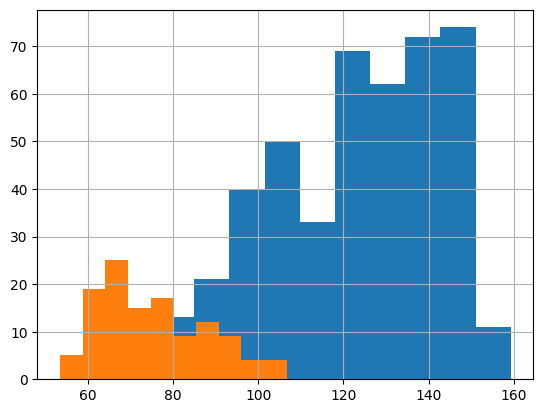

In [8]:
academies.get_group("PARIS")["ips"].hist()
academies.get_group("MAYOTTE")["ips"].hist()

<Axes: >

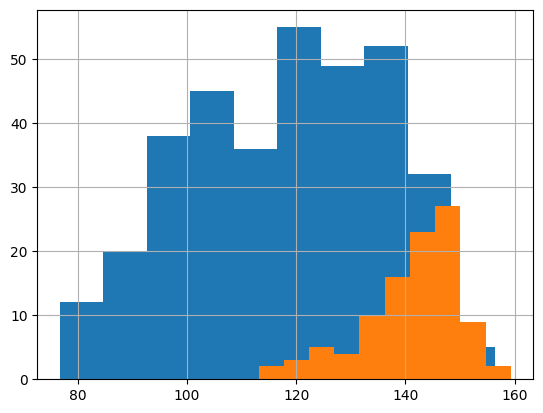

In [9]:
academie_PARIS_secteurs = academies.get_group("PARIS").groupby("secteur")
academie_PARIS_secteurs.get_group("public")["ips"].hist()
academie_PARIS_secteurs.get_group("privé sous contrat")["ips"].hist()

In [10]:
codes_insee = data_ips_ecoles.groupby("code_insee_de_la_commune")
codes_insee.get_group("29190")

,rentree_scolaire,code_region,region,code_de_l_academie,academie,code_du_departement,departement,code_insee_de_la_commune,nom_de_la_commune,uai,...,ips_departemental_public,ips_departemental,num_ligne,appellation_officielle,libelle_commune,code_departement,code_commune,libelle_departement,libelle_academie,position
0,2023-2024,3,BRETAGNE,14,RENNES,29.0,FINISTERE,29190,PLOUGONVELIN,0290852U,...,106.5,109.2,39176.0,Ecole élémentaire publique Roz Avel,Plougonvelin,029,29190,Finistère,Rennes,"48.34187237589531,-4.719900198455342"
14236,2023-2024,3,BRETAGNE,14,RENNES,29.0,FINISTERE,29190,PLOUGONVELIN,0290852U,...,106.5,109.2,39176.0,Ecole primaire publique Roz Avel,Plougonvelin,029,29190,Finistère,Rennes,"48.34187237589531,-4.719900198455342"
26768,2023-2024,3,BRETAGNE,14,RENNES,29.0,FINISTERE,29190,PLOUGONVELIN,0291275D,...,106.5,109.2,39301.0,Ecole primaire privée Sacré-Coeur,Plougonvelin,029,29190,Finistère,Rennes,"48.342940474836176,-4.72046009000189"


In [11]:
data_ips_ecoles_communes = codes_insee["ips"].mean().reset_index()
data_ips_ecoles_communes.head()

,code_insee_de_la_commune,ips
0,01001,104.500
1,01004,100.575
2,01005,113.700
3,01007,109.400
4,01008,110.700


## Cartes

In [12]:
data_ips_ecoles_geo_communes = geo_communes.merge(data_ips_ecoles_communes, left_on="code_insee", right_on="code_insee_de_la_commune", how="left")
data_ips_ecoles_geo_communes.head()

,cleabs,nom_officiel,nom_officiel_en_majuscules,statut,code_insee,population,date_du_recensement,organisme_recenseur,code_insee_du_canton,code_insee_de_l_arrondissement,code_insee_du_departement,code_insee_de_la_region,codes_siren_des_epci,code_siren,code_postal,superficie_cadastrale,geometry,code_insee_de_la_commune,ips
0,COMMUNE_0000000000001001,L'Abergement-Clémenciat,L'ABERGEMENT-CLEMENCIAT,Commune simple,01001,860,2023-01-01,INSEE,0108,012,01,84,200069193,210100012,01400,1590,"MULTIPOLYGON (((4.95841 46.15327, 4.95812 46.1...",01001,104.500
1,COMMUNE_0000000000001002,L'Abergement-de-Varey,L'ABERGEMENT-DE-VAREY,Commune simple,01002,270,2023-01-01,INSEE,0101,011,01,84,240100883,210100020,01640,920,"MULTIPOLYGON (((5.4302 45.98277, 5.43012 45.98...",NaN,NaN
2,COMMUNE_0000000000001004,Ambérieu-en-Bugey,AMBERIEU-EN-BUGEY,Commune simple,01004,15934,2023-01-01,INSEE,0101,011,01,84,240100883,210100046,01500,2460,"MULTIPOLYGON (((5.40882 45.94206, 5.4085 45.94...",01004,100.575
3,COMMUNE_0000000000001005,Ambérieux-en-Dombes,AMBERIEUX-EN-DOMBES,Commune simple,01005,1906,2023-01-01,INSEE,0122,012,01,84,200042497,210100053,01330,1590,"MULTIPOLYGON (((4.94298 45.97962, 4.94257 45.9...",01005,113.700
4,COMMUNE_0000000000001006,Ambléon,AMBLEON,Commune simple,01006,115,2023-01-01,INSEE,0104,011,01,84,200040350,210100061,01300,590,"MULTIPOLYGON (((5.57083 45.75338, 5.57219 45.7...",NaN,NaN


In [13]:
print("Nombre total:", len(data_ips_ecoles_geo_communes))
print("Géométries manquantes:", data_ips_ecoles_geo_communes.geometry.isna().sum())
print("IPS manquants:", data_ips_ecoles_geo_communes["ips"].isna().sum())
data_ips_ecoles_geo_communes = data_ips_ecoles_geo_communes.dropna(subset=["geometry"])
data_ips_ecoles_geo_communes = data_ips_ecoles_geo_communes.dropna(subset=["ips"])

Nombre total: 34877
Géométries manquantes: 0
IPS manquants: 18740


In [14]:
print(data_ips_ecoles_geo_communes.dtypes)

cleabs                                       str
nom_officiel                                 str
nom_officiel_en_majuscules                   str
statut                                       str
code_insee                                   str
population                                 int32
date_du_recensement               datetime64[ms]
organisme_recenseur                          str
code_insee_du_canton                         str
code_insee_de_l_arrondissement               str
code_insee_du_departement                    str
code_insee_de_la_region                      str
codes_siren_des_epci                         str
code_siren                                   str
code_postal                                  str
superficie_cadastrale                      int32
geometry                                geometry
code_insee_de_la_commune                     str
ips                                      float64
dtype: object


In [15]:
data_ips_ecoles_geo_communes.drop(columns=["date_du_recensement"], inplace=True)

In [24]:
data_ips_ecoles_geo_communes_dept_28 = data_ips_ecoles_geo_communes[data_ips_ecoles_geo_communes['code_insee_du_departement'] == '28']

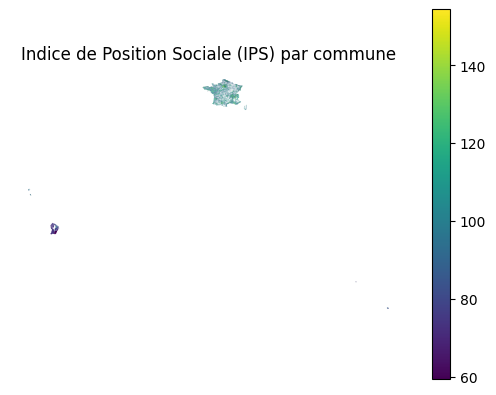

In [25]:
data_ips_ecoles_geo_communes.plot(column="ips", cmap="viridis", legend=True)
plt.title("Indice de Position Sociale (IPS) par commune")
plt.axis("off")
plt.show()

In [17]:
map = data_ips_ecoles_geo_communes.explore(
	column="ips",
	cmap="viridis",
	legend=True,
	tooltip=["code_insee", "ips"]
)

In [18]:
map.save("map.html")

In [19]:
# map = folium.Map(location=[48.8566, 2.3522], zoom_start=5)

# folium.Choropleth(
# 	geo_data=data_ips_ecoles_geo_communes,
# 	data=data_ips_ecoles_geo_communes,
# 	columns=["code_insee", "ips"],
# 	key_on="feature.properties.code_insee",
# 	fill_color="YlGn",
# 	fill_opacity=0.7,
# 	line_opacity=0.2,
# 	legend_name="IPS par commune"
# ).add_to(map)

# map.save("ips_par_commune.html")